In [29]:
import numpy as np
import pandas as pd

# Import the datasets
apple_term_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-Term_reduced.csv')
apple_2gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-Bigram_reduced.csv')
apple_3gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-Trigram_reduced.csv')
apple_4gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-4-gram_reduced.csv')

In [30]:
# Term training data and labels
X_train_term = apple_term_training.iloc[:, :-1].values
y_train_term = apple_term_training.iloc[:, -1].values

# Bigram training data and labels
X_train_2gram = apple_2gram_training.iloc[:, :-1].values
y_train_2gram = apple_2gram_training.iloc[:, -1].values

# 3gram training data and labels
X_train_3gram = apple_3gram_training.iloc[:, :-1].values
y_train_3gram = apple_3gram_training.iloc[:, -1].values

# 4gram training data and labels
X_train_4gram = apple_4gram_training.iloc[:, :-1].values
y_train_4gram = apple_4gram_training.iloc[:, -1].values

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Term - Average accuracy: 0.598 (+- 0.041)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Bigram - Average accuracy: 0.645 (+- 0.038)
Trigram - Average accuracy: 0.651 (+- 0.042)
4-gram - Average accuracy: 0.639 (+- 0.037)


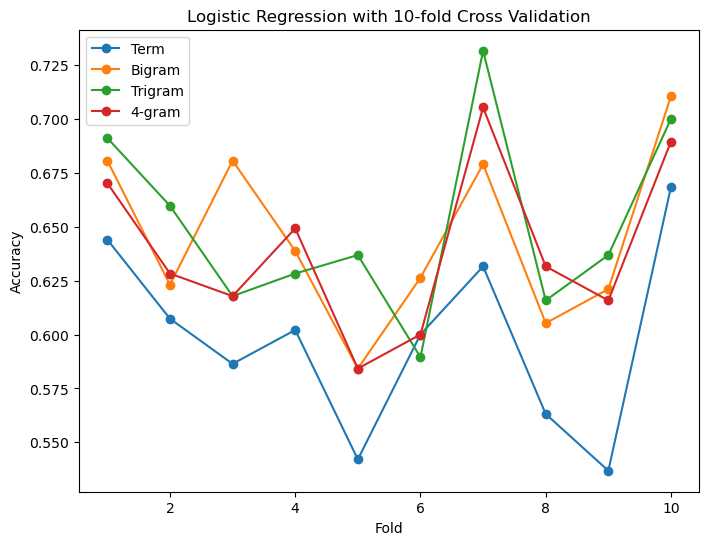


Classification Report (Term):
              precision    recall  f1-score     support
0              0.200000  0.010512  0.019975   761.00000
1              0.596030  0.972003  0.738942  1143.00000
accuracy       0.587710  0.587710  0.587710     0.58771
macro avg      0.398015  0.491258  0.379459  1904.00000
weighted avg   0.437743  0.587710  0.451582  1904.00000

Classification Report (Bigram):
              precision    recall  f1-score     support
0              0.579295  0.345598  0.432922   761.00000
1              0.656552  0.832896  0.734285  1143.00000
accuracy       0.638130  0.638130  0.638130     0.63813
macro avg      0.617923  0.589247  0.583603  1904.00000
weighted avg   0.625673  0.638130  0.613834  1904.00000

Classification Report (Trigram):
              precision    recall  f1-score      support
0              0.598726  0.247043  0.349767   761.000000
1              0.639623  0.889764  0.744237  1143.000000
accuracy       0.632878  0.632878  0.632878     0.632878
ma

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

# Adjust pandas display options
pd.options.display.max_columns = None
pd.options.display.width = None

def evaluate_model(n_gram, X_train, y_train, ax):
    model = LogisticRegression(solver='saga', max_iter=3000)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)
    print(f'{n_gram} - Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
    
    ax.plot(range(1, k+1), scores, '-o', label=n_gram)
    
    y_pred = cross_val_predict(model, X_train, y_train, cv=k)
    report = classification_report(y_train, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    
    return report_df

k = 10
cv = KFold(n_splits=k, random_state=42, shuffle=True)
fig, ax = plt.subplots(figsize=(8, 6))

n_grams = ['Term', 'Bigram', 'Trigram', '4-gram']
X_train_list = [X_train_term, X_train_2gram, X_train_3gram, X_train_4gram]
y_train_list = [y_train_term, y_train_2gram, y_train_3gram, y_train_4gram]

reports = []
for n_gram, X_train, y_train in zip(n_grams, X_train_list, y_train_list):
    report_df = evaluate_model(n_gram, X_train, y_train, ax)
    reports.append(report_df)

ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title(f'Logistic Regression with {k}-fold Cross Validation')
ax.legend()
plt.show()

# Print classification reports
for n_gram, report_df in zip(n_grams, reports):
    print(f'\nClassification Report ({n_gram}):')
    print(report_df)
